**EDA**


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn.linearmodels as sblm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

/Users/m.arthurbentil/anaconda3/lib/python3.6/site-packages/seaborn/linearmodels.py:5: UserWarning: The `linearmodels` module has been renamed `regression`.
  warnings.warn(msg)


In [3]:
usda = pd.read_csv('/Users/m.arthurbentil/Desktop/LL/Capstone/USDA_data.csv')

In [4]:
usda.head()

,FIPS,State,County,"County, State","2016 Population, Estimate",LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,AL,Autauga,"Autauga, AL","55,416",18428.439690,17496.693040,-5.056026,33.769657,32.062255,...,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,AL,Baldwin,"Baldwin, AL","208,563",35210.814080,30561.264430,-13.204891,19.318473,16.767489,...,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,AL,Barbour,"Barbour, AL","25,965",5722.305602,6069.523628,6.067799,20.840972,22.105560,...,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,AL,Bibb,"Bibb, AL","22,643",1044.867327,969.378841,-7.224696,4.559753,4.230324,...,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,AL,Blount,"Blount, AL","57,704",1548.175559,3724.428242,140.568857,2.700840,6.497380,...,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


Prior to performing EDA the data set, let's drop our unnecessary columns (refer to technical report for more information on process). We'll collect all the columns we do need and group it to one variable.

In [5]:
food_desert = ['State', 'County', 'County, State','2016 Population, Estimate', 'PCT_LACCESS_POP15', 
               'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15',
               'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHPI15', 'GROC14', 'SUPERC14', 
               'CONVS14', 'SPECS14', 'SNAPS16', 'FFR14', 'FSR14', 'PC_FFRSALES12', 'PC_FSRSALES12', 'PCT_SNAP16',
               'PCT_NSLP15', 'PCT_SFSP15', 'PCT_CACFP15', 'SODATAX_STORES14', 'CHIPSTAX_STORES14', 
               'FOOD_TAX14', 'FMRKT16', 'PCT_FMRKT_SNAP16', 'PCT_FMRKT_FRVEG16', 'VEG_FARMS12', 'SLHOUSE12', 
               'FOODHUB16','CSA12', 'AGRITRSM_OPS12', 'AGRITRSM_RCT12', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13',
               'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
               'MEDHHINC15', 'POVRATE15']

In [6]:
# Creating a variable to collect the leftover columns
food_desert_leftover = [col for col in usda if col not in food_desert]

In [7]:
#Dropping unnecessary columns
usda.drop(food_desert_leftover, axis=1, inplace=True)

In [8]:
usda.head()

,State,County,"County, State","2016 Population, Estimate",PCT_LACCESS_POP15,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_NHNA15,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,MEDHHINC15,POVRATE15
0,AL,Autauga,"Autauga, AL","55,416",32.062255,23.163613,7.726582,0.863345,0.159000,0.112092,...,13.0,34.1,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,56580.0,12.7
1,AL,Baldwin,"Baldwin, AL","208,563",16.767489,13.981393,1.942757,0.755973,0.116833,0.099662,...,10.4,27.4,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,52387.0,12.9
2,AL,Barbour,"Barbour, AL","25,965",22.105560,10.302934,9.881360,1.855183,0.062266,0.145539,...,18.4,44.4,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,31433.0,32.0
3,AL,Bibb,"Bibb, AL","22,643",4.230324,2.358770,1.828933,0.037516,0.008703,0.010967,...,14.8,40.3,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,40767.0,22.2
4,AL,Blount,"Blount, AL","57,704",6.497380,5.909147,0.167201,0.867886,0.014705,0.050484,...,14.1,34.6,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,50487.0,14.7


In [9]:
usda['PCT_LACCESS_NHNA15']

0       0.112092
1       0.099662
2       0.145539
3       0.010967
4       0.050484
5       0.070600
6       0.034844
7       0.099768
8       0.060465
9       0.000835
10      0.021677
11      0.036078
12      0.068787
13      0.019866
14      0.011219
15      0.216637
16      0.071141
17      0.108823
18      0.028963
19      0.049577
20      0.113491
21      0.030064
22      0.216184
23      0.020019
24      0.052394
25      0.074350
26      0.292205
27      0.058637
28      0.000000
29      0.131215
          ...   
3113    0.205599
3114    0.066151
3115    0.105376
3116    0.079435
3117    0.011683
3118    0.120768
3119    0.114065
3120    0.211525
3121    0.147290
3122    0.191262
3123    0.422938
3124    0.147737
3125    0.170204
3126    1.150568
3127    0.121709
3128    0.404615
3129    0.080821
3130    0.361333
3131    0.186508
3132    0.405476
3133    0.000000
3134    0.092232
3135    0.054125
3136    0.687119
3137    0.204066
3138    0.432866
3139    0.152542
3140    0.1910

In [10]:
# Create a function to give an update on necessary EDA checks

def DataInspect(dataframe):
    '''Originally from Ritika Basher and improved upon by Matt Speck. Provides overview of
       dataset including missing values, duplicates and types.
       Takes a Pandas dataframe as the argument.'''
    print("Missing Values \n \n", dataframe.isnull().sum(),"\n")
    print("Duplicate Rows \n", dataframe.duplicated().sum(),"\n")
    print("Dataframe Types \n \n", dataframe.dtypes,"\n")
    print("Dataframe Shape \n", dataframe.shape,"\n")
    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())

In [11]:
DataInspect(usda)

Missing Values 
 
 State                           0
County                          0
County, State                   0
2016 Population, Estimate       0
PCT_LACCESS_POP15              19
PCT_LACCESS_WHITE15            19
PCT_LACCESS_BLACK15            19
PCT_LACCESS_HISP15             19
PCT_LACCESS_NHASIAN15          19
PCT_LACCESS_NHNA15             19
PCT_LACCESS_NHPI15             19
GROC14                          0
SUPERC14                        0
CONVS14                         0
SPECS14                         0
SNAPS16                        26
FFR14                           0
FSR14                           0
PC_FFRSALES12                   0
PC_FSRSALES12                   0
PCT_SNAP16                      0
PCT_NSLP15                      0
PCT_SFSP15                      0
PCT_CACFP15                     0
SODATAX_STORES14                0
CHIPSTAX_STORES14               0
FOOD_TAX14                      0
FMRKT16                         0
PCT_FMRKT_SNAP16             

In [12]:
# Replace all the NaNs with zeros
usda.fillna(0, inplace=True)

In [13]:
# Checking the number of NaNs
usda.isnull().sum()

State                        0
County                       0
County, State                0
2016 Population, Estimate    0
PCT_LACCESS_POP15            0
PCT_LACCESS_WHITE15          0
PCT_LACCESS_BLACK15          0
PCT_LACCESS_HISP15           0
PCT_LACCESS_NHASIAN15        0
PCT_LACCESS_NHNA15           0
PCT_LACCESS_NHPI15           0
GROC14                       0
SUPERC14                     0
CONVS14                      0
SPECS14                      0
SNAPS16                      0
FFR14                        0
FSR14                        0
PC_FFRSALES12                0
PC_FSRSALES12                0
PCT_SNAP16                   0
PCT_NSLP15                   0
PCT_SFSP15                   0
PCT_CACFP15                  0
SODATAX_STORES14             0
CHIPSTAX_STORES14            0
FOOD_TAX14                   0
FMRKT16                      0
PCT_FMRKT_SNAP16             0
PCT_FMRKT_FRVEG16            0
VEG_FARMS12                  0
SLHOUSE12                    0
FOODHUB1

In [14]:
# Removing the comma in the column '2016 Population Estimate' and turning the value type to a float
usda['2016 Population, Estimate'] = usda['2016 Population, Estimate'].str.replace(',', '')
usda['2016 Population, Estimate'] = usda['2016 Population, Estimate'].astype(float)

In [15]:
usda.head()

,State,County,"County, State","2016 Population, Estimate",PCT_LACCESS_POP15,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_NHNA15,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,MEDHHINC15,POVRATE15
0,AL,Autauga,"Autauga, AL",55416.0,32.062255,23.163613,7.726582,0.863345,0.159000,0.112092,...,13.0,34.1,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,56580.0,12.7
1,AL,Baldwin,"Baldwin, AL",208563.0,16.767489,13.981393,1.942757,0.755973,0.116833,0.099662,...,10.4,27.4,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,52387.0,12.9
2,AL,Barbour,"Barbour, AL",25965.0,22.105560,10.302934,9.881360,1.855183,0.062266,0.145539,...,18.4,44.4,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,31433.0,32.0
3,AL,Bibb,"Bibb, AL",22643.0,4.230324,2.358770,1.828933,0.037516,0.008703,0.010967,...,14.8,40.3,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,40767.0,22.2
4,AL,Blount,"Blount, AL",57704.0,6.497380,5.909147,0.167201,0.867886,0.014705,0.050484,...,14.1,34.6,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,50487.0,14.7


In [16]:
# Taking a closer look at the stats of the columns
usda.describe()

,"2016 Population, Estimate",PCT_LACCESS_POP15,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_NHNA15,PCT_LACCESS_NHPI15,GROC14,SUPERC14,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,MEDHHINC15,POVRATE15
count,3.143000e+03,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,1.027987e+05,22.944920,18.862254,1.868289,2.009050,0.247843,0.799881,0.019091,20.991091,1.688514,...,11.232549,31.007222,78.294698,8.748643,8.283674,1.136731,1.871411,0.080453,48549.340121,16.240280
std,3.302719e+05,19.625159,17.538602,4.129277,5.017711,0.692025,4.820871,0.134487,90.364957,3.996579,...,2.493210,4.556201,19.888149,14.421441,13.190860,2.469841,7.606763,0.945576,12465.227188,6.464273
min,8.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.667918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.096600e+04,10.755175,8.359325,0.054771,0.192080,0.026473,0.026611,0.000000,3.000000,0.000000,...,9.500000,28.300000,66.917367,0.398882,1.593821,0.269818,0.194950,0.009995,40358.000000,11.500000
50%,2.576700e+04,19.130715,15.112070,0.253482,0.569132,0.084474,0.071223,0.003166,5.000000,1.000000,...,11.100000,31.200000,85.763450,1.905529,3.283237,0.463388,0.305003,0.022916,46788.000000,15.200000
75%,6.742100e+04,28.809723,23.583862,1.663818,1.663065,0.246487,0.185396,0.012949,12.000000,1.000000,...,12.900000,33.800000,94.168544,9.732428,8.211819,0.985868,0.626658,0.046468,54150.000000,19.700000
max,1.013792e+07,100.000001,99.163179,50.136324,79.323968,25.087551,83.844210,4.469546,2429.000000,95.000000,...,23.500000,47.600000,99.163180,85.438778,95.744774,43.014686,94.945703,48.888889,125900.000000,47.400000


In [17]:
# Distribution of all counties' low access percentage
plt.figure(figsize=(10, 9))
sns.distplot(usda['PCT_LACCESS_POP15'], color='r', bins=25, hist_kws={'alpha': 0.4});

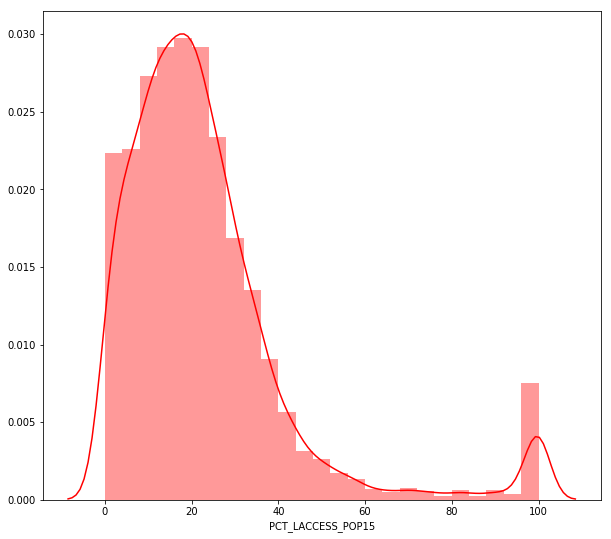

In [18]:
plt.show()

In [19]:
# Histogram of all counties' low access percentage categorized by race
# Creating a variable for all race categories

usda.rename(columns={'PCT_LACCESS_POP15': 'Low Access: All Populations (%)',
                     'PCT_LACCESS_WHITE15':'Low Access: White (%)', 
                     'PCT_LACCESS_BLACK15':'Low Access: Black (%)', 
                     'PCT_LACCESS_HISP15':'Low Access: Hispanic (%)', 
                     'PCT_LACCESS_NHASIAN15':'Low Access: Asian (%)',
                     'PCT_LACCESS_NHNA15':'Low Access: Native American (%)', 
                     'PCT_LACCESS_NHPI15': 'Low Access: Hawaii Pacific (%)'},inplace=True) 

In [20]:
usda_race = usda[['Low Access: All Populations (%)','Low Access: White (%)', 'Low Access: Black (%)',
            'Low Access: Hispanic (%)', 'Low Access: Asian (%)',
            'Low Access: Native American (%)', 'Low Access: Hawaii Pacific (%)']]

In [21]:
usda_race.hist(figsize=(16, 20), bins=25, xlabelsize=10, ylabelsize=10);

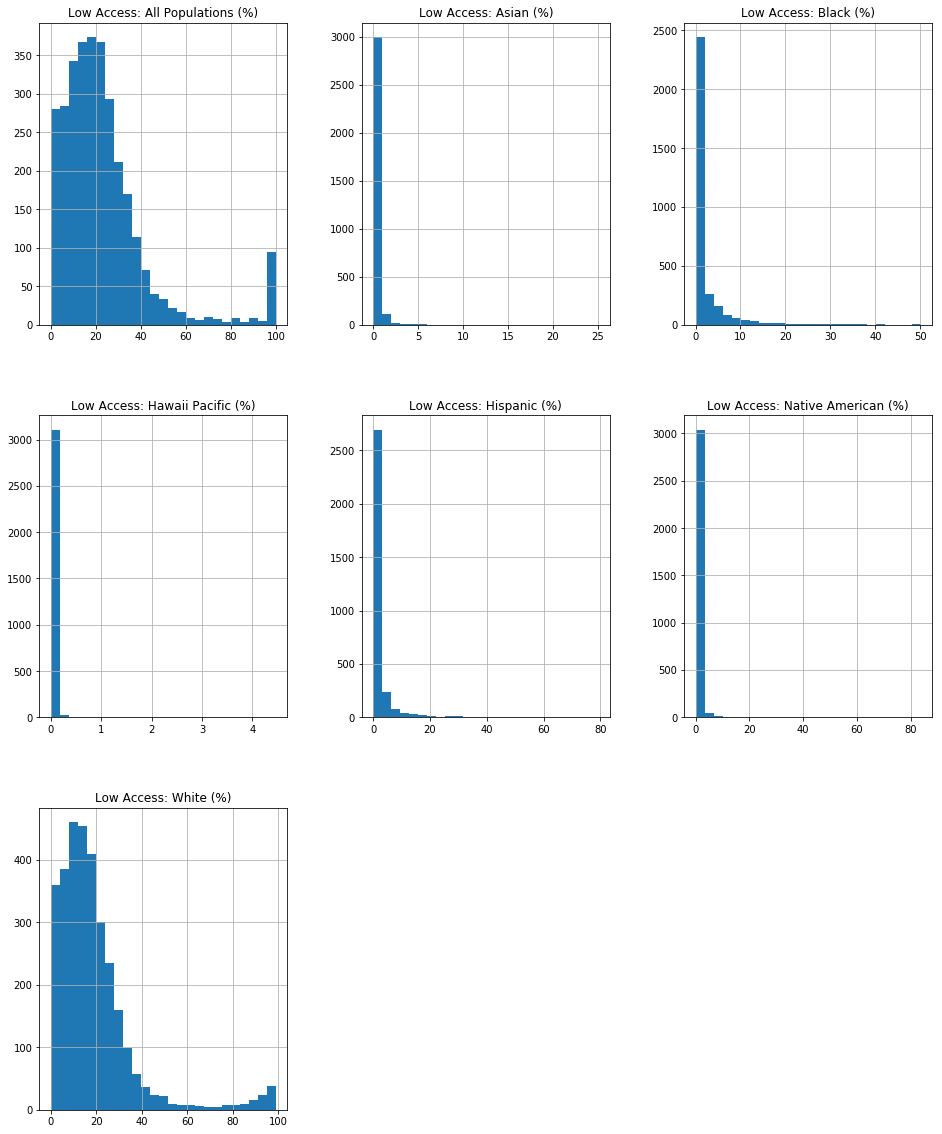

In [22]:
plt.show()

In [23]:
# Generating a correlation heatmap for low access by race and and all populations

sns.heatmap(usda_race.corr(), annot = True, linewidths = 0.5)

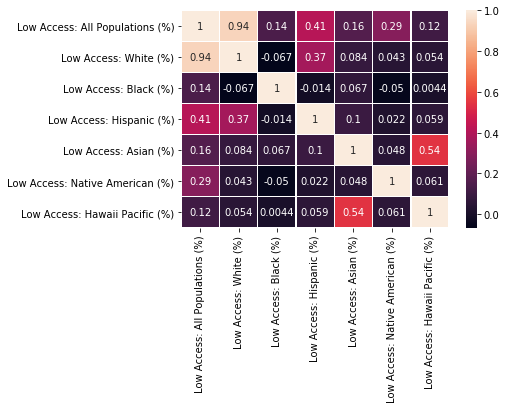

In [24]:
plt.show()

In the immeadiate cells above, we categorized all low access race variables into one. We're going to do the same for variables that fall under the following categories (with our Y variable 'Low Access: All Populations' placed within each new category variable):

1. Stores: Type of stores (new variable: **usda_stores**)
2. Restaurants: Food service type and expenditures (new variable: **usda_res**)
3. Assistance: Types of food assistance programs provided (new variable: **usda_assist**)
4. Sales Tax: Taxes of various food items (new variable: **usda_tax**)
5. Local Food Operations: Types of local food operations present e.g. farmers' markets (new variable: **usda_local**)
6. Health: Health status of residents (new variable: **usda_health**)
7. Socioeconomic: Racial and economic status of all residents (regardless of being low access or not) 
   [new variable: **usda_socio**]

In [25]:
usda.columns

Index(['State', 'County', 'County, State', '2016 Population, Estimate',
       'Low Access: All Populations (%)', 'Low Access: White (%)',
       'Low Access: Black (%)', 'Low Access: Hispanic (%)',
       'Low Access: Asian (%)', 'Low Access: Native American (%)',
       'Low Access: Hawaii Pacific (%)', 'GROC14', 'SUPERC14', 'CONVS14',
       'SPECS14', 'SNAPS16', 'FFR14', 'FSR14', 'PC_FFRSALES12',
       'PC_FSRSALES12', 'PCT_SNAP16', 'PCT_NSLP15', 'PCT_SFSP15',
       'PCT_CACFP15', 'SODATAX_STORES14', 'CHIPSTAX_STORES14', 'FOOD_TAX14',
       'FMRKT16', 'PCT_FMRKT_SNAP16', 'PCT_FMRKT_FRVEG16', 'VEG_FARMS12',
       'SLHOUSE12', 'FOODHUB16', 'CSA12', 'AGRITRSM_OPS12', 'AGRITRSM_RCT12',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'PCT_NHWHITE10',
       'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10',
       'PCT_NHPI10', 'MEDHHINC15', 'POVRATE15'],
      dtype='object')

In [26]:
# Rename the 'Store', 'Restaurant', 'Assistance', and 'Sales Tax' variables 

usda.rename(columns={'GROC14': 'Grocery Stores (#)', 'SUPERC14': 'Supercenter/Club Stores (#)', 
                     'CONVS14': 'Convenience Stores (#)', 'SPECS14': 'Speciality Stores (#)', 
                     'SNAPS16': 'SNAP Approved Stores (#)'}, inplace=True)

usda.rename(columns={'FFR14': 'Fast Food Restaurants (#)', 'FSR14': 'Full Service Restaurants (#)', 
                     'PC_FFRSALES12': 'Expenditure Per Capita: Fast Food ($)', 
                     'PC_FSRSALES12': 'Expenditure Per Capita: Restaurants ($)', 
                     }, inplace=True)

usda.rename(columns={'PCT_SNAP16': 'SNAP Participants (%)', 'PCT_NSLP15': 'National School Lunch Program (%)', 
                     'PCT_SFSP15': 'Summer Food Service Program (%)', 'PCT_CACFP15': 'Child & Adult Care (%)', 
                     }, inplace=True)

usda.rename(columns={'SODATAX_STORES14': 'Soda Sales Tax: Retail (%)', 'CHIPSTAX_STORES14': 'Chip and Pretzel Sales Tax: Retail (%)', 
                     'FOOD_TAX14': 'General Food Sales Tax: Retail (%)'}, inplace=True)


In [27]:
# Place above variables into their own categories

usda_stores = usda[['Low Access: All Populations (%)', 'Grocery Stores (#)', 'Supercenter/Club Stores (#)', 
                     'Convenience Stores (#)', 'Speciality Stores (#)', 'SNAP Approved Stores (#)']]

usda_res = usda[['Low Access: All Populations (%)','Fast Food Restaurants (#)', 'Full Service Restaurants (#)',
                 'Expenditure Per Capita: Fast Food ($)', 
                 'Expenditure Per Capita: Restaurants ($)']]

usda_assist = usda[['Low Access: All Populations (%)','SNAP Participants (%)', 'National School Lunch Program (%)', 
                    'Summer Food Service Program (%)', 'Child & Adult Care (%)']]

usda_tax = usda[['Low Access: All Populations (%)','Soda Sales Tax: Retail (%)', 'Chip and Pretzel Sales Tax: Retail (%)', 
                 'General Food Sales Tax: Retail (%)']]

In [28]:
# Rename the 'Local Food Operations', 'Health', and 'Socioeconomic' variables 

usda.rename(columns={'FMRKT16': 'Farmers Markets (#)' , 'PCT_FMRKT_SNAP16': 'Farmers Markets Accepting SNAP (%)', 
                     'PCT_FMRKT_FRVEG16': 'Farmers Markets Selling Veg (%)', 'VEG_FARMS12': 'Vegetable Farms (#)', 
                     'SLHOUSE12': 'Slaughterhouses (#)', 'FOODHUB16': 'Food Hubs (#)' , 
                     'CSA12': 'CSAs (#)', 'AGRITRSM_OPS12': 'Agritourism Operations (#)','AGRITRSM_RCT12': 'Agritourism Receipts ($)' }, inplace=True)

usda.rename(columns={'PCT_DIABETES_ADULTS13': 'Adult Diabetes Rate (%)', 
                     'PCT_OBESE_ADULTS13': 'Adult Obesity Rate (%)'}, inplace=True)

usda.rename(columns={'PCT_NHWHITE10': 'White Population (%)', 'PCT_NHBLACK10': 'Black Population (%)', 
                     'PCT_HISP10': 'Hispanic Population (%)', 'PCT_NHASIAN10': 'Asian Population (%)',
                     'PCT_NHNA10': 'Native American Population (%)', 'PCT_NHPI10': 'Hawaii Pacific (%)' , 
                     'MEDHHINC15': 'Median Income ($)', 'POVRATE15':  'Poverty Rate (%)'}, inplace=True)

In [29]:
# Place above variables into their own categories

usda_local = usda[['Low Access: All Populations (%)', 'Farmers Markets (#)', 'Farmers Markets Accepting SNAP (%)', 
                   'Farmers Markets Selling Veg (%)', 'Vegetable Farms (#)', 'Slaughterhouses (#)',
                   'Food Hubs (#)', 'CSAs (#)', 'Agritourism Operations (#)', 'Agritourism Receipts ($)']]

usda_health = usda[['Low Access: All Populations (%)','Adult Diabetes Rate (%)', 'Adult Obesity Rate (%)']]

usda_socio = usda[['Low Access: All Populations (%)','White Population (%)', 'Black Population (%)', 
                   'Hispanic Population (%)', 'Asian Population (%)', 'Native American Population (%)',
                   'Hawaii Pacific (%)', 'Median Income ($)', 'Poverty Rate (%)']]

In [30]:
# Producing histograms and correlation heat maps for the newly created variables

usda_list = [usda_race, usda_stores, usda_res, usda_assist, usda_tax, usda_local, usda_health, usda_socio]

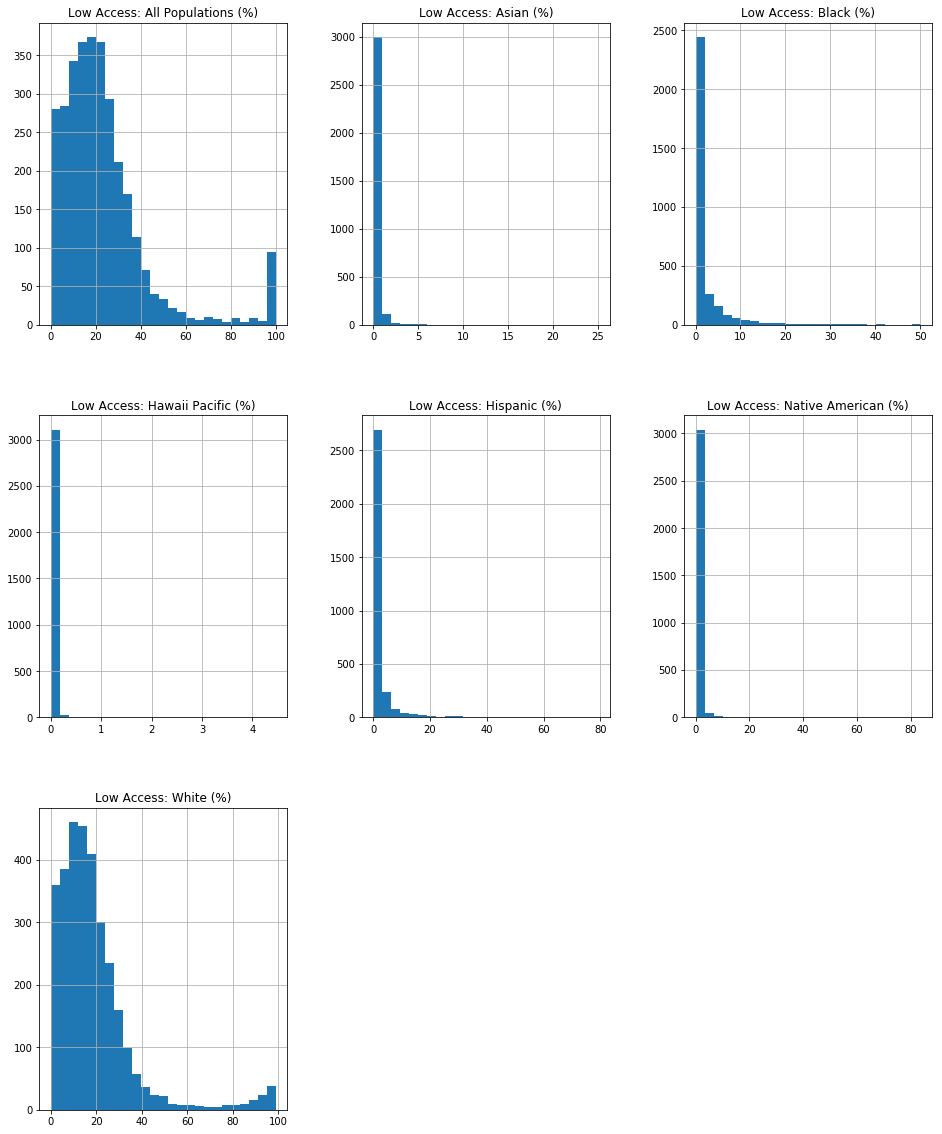

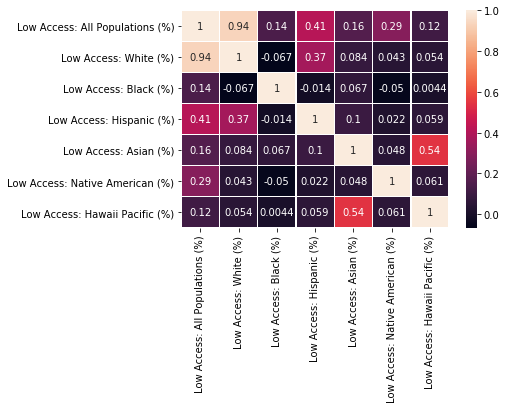

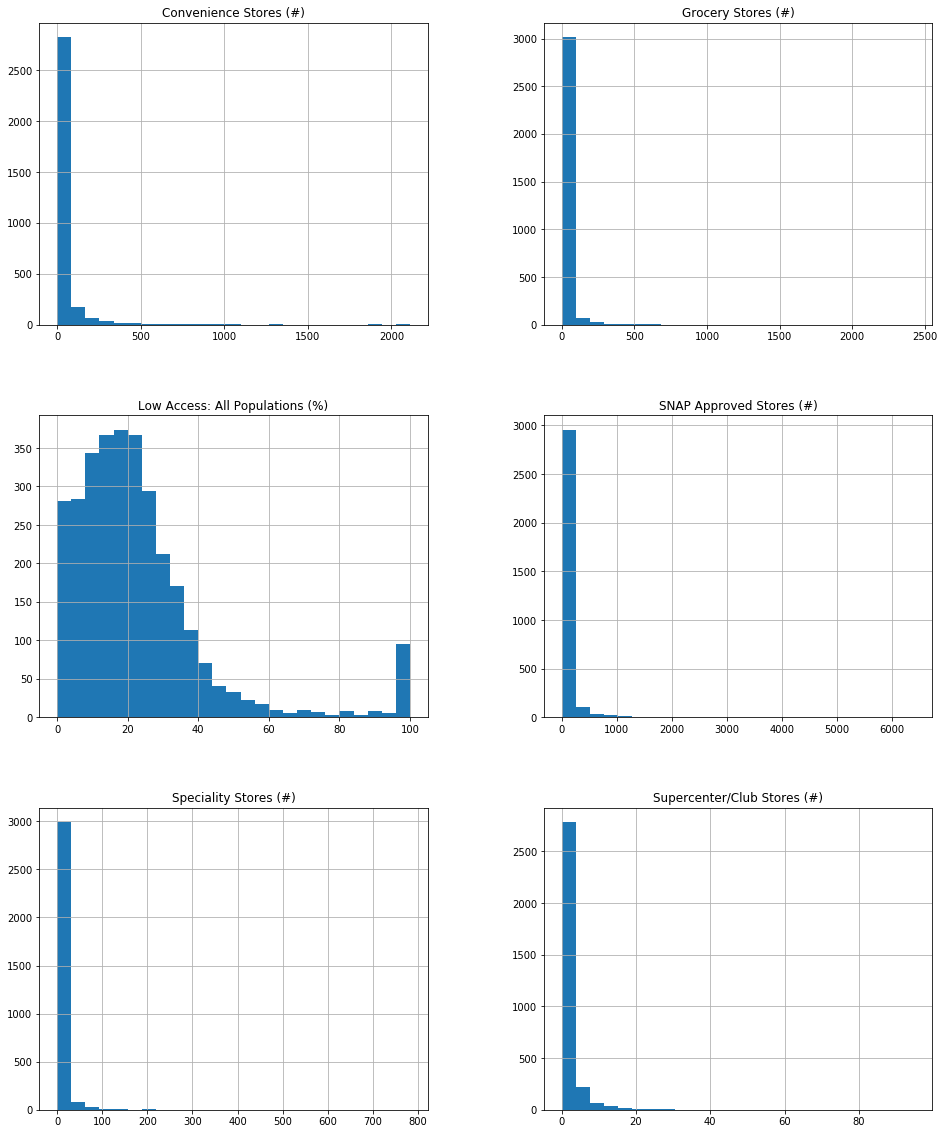

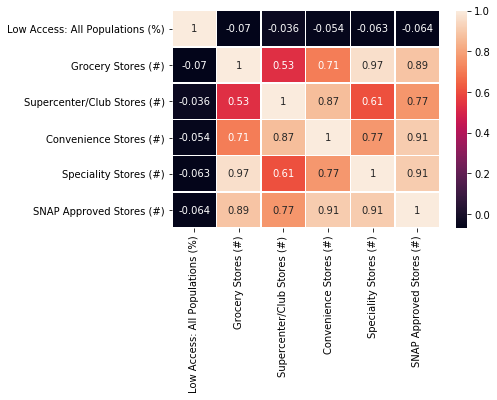

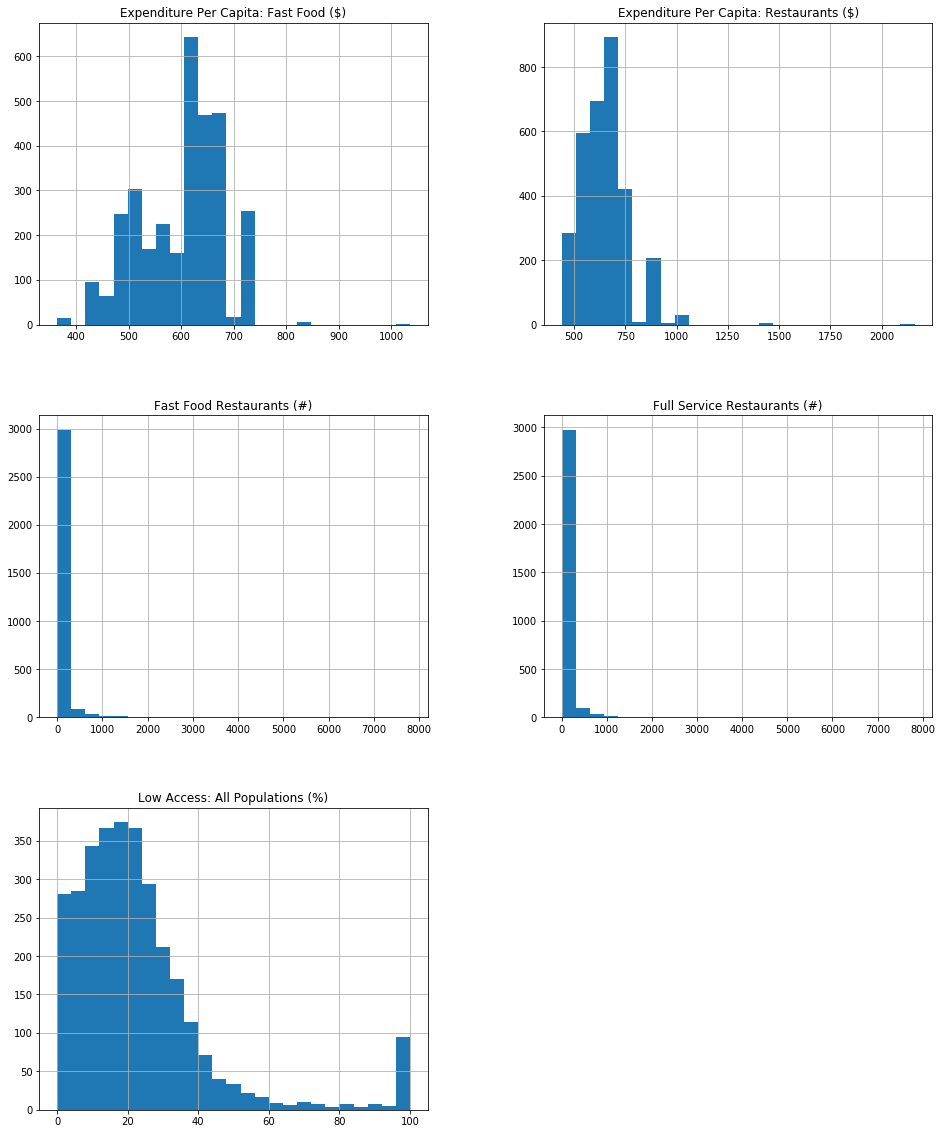

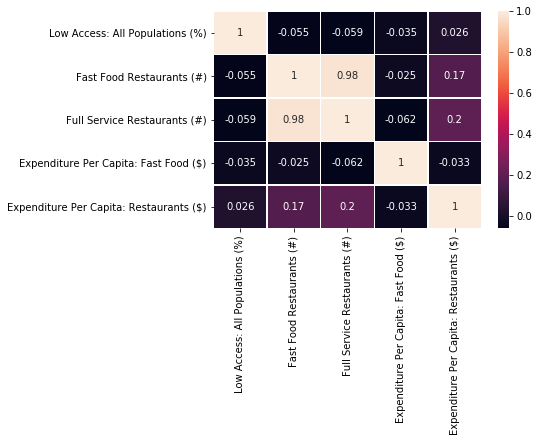

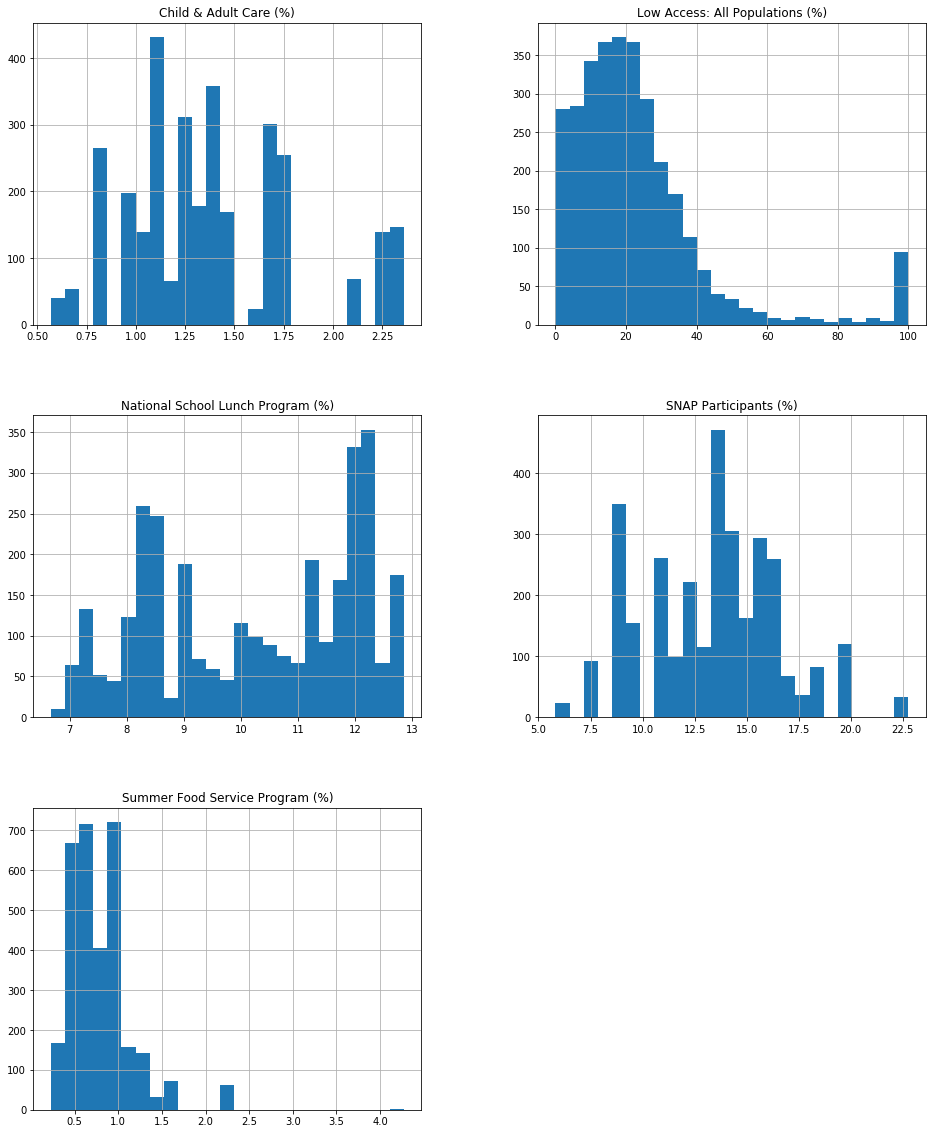

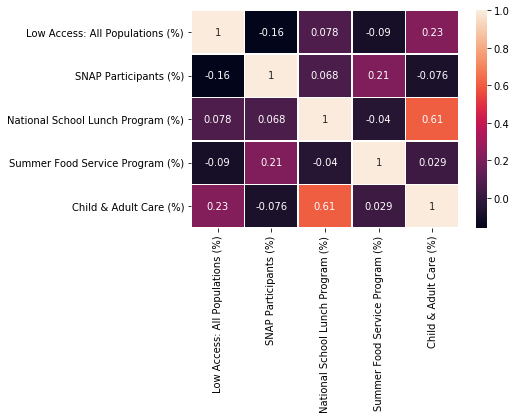

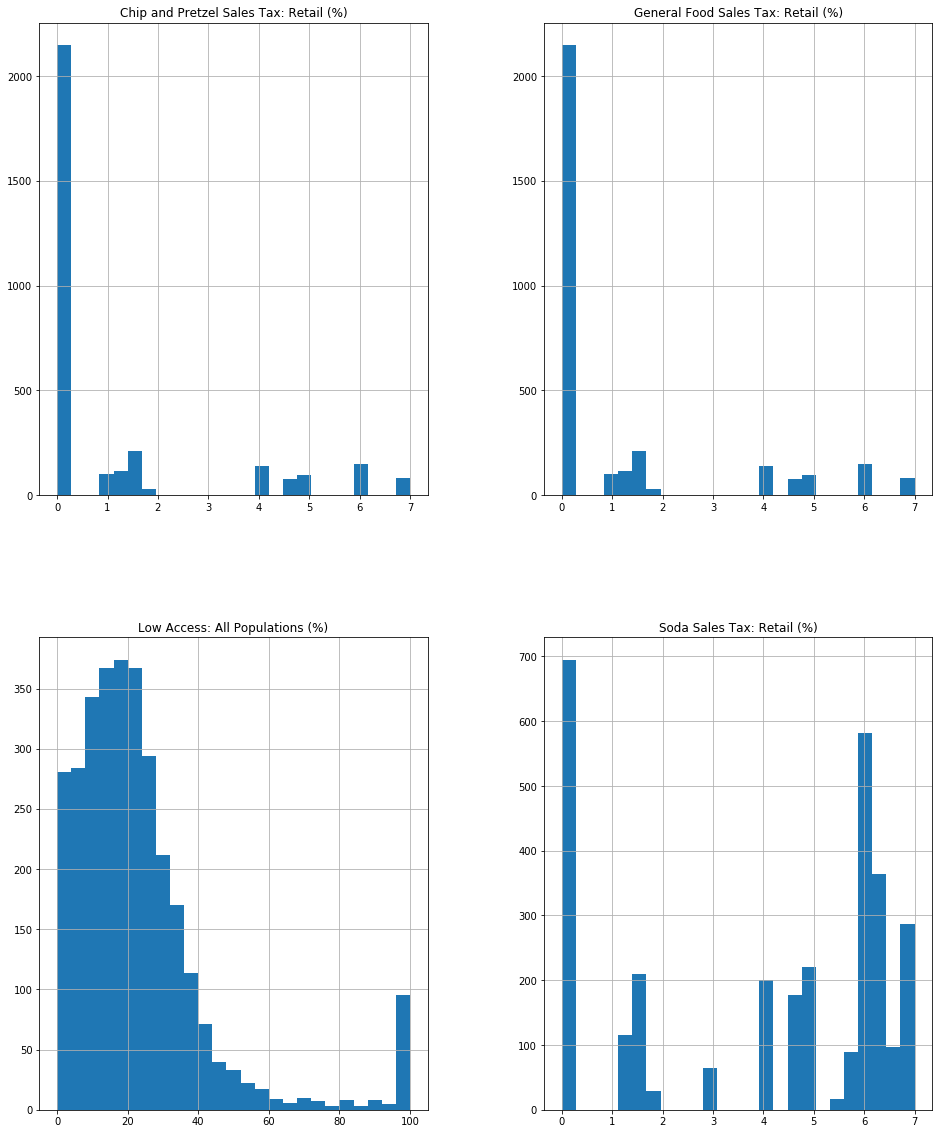

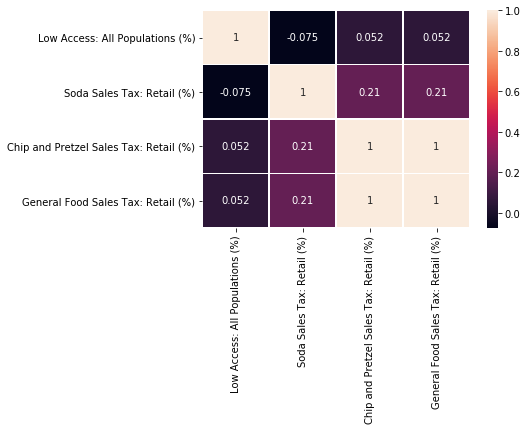

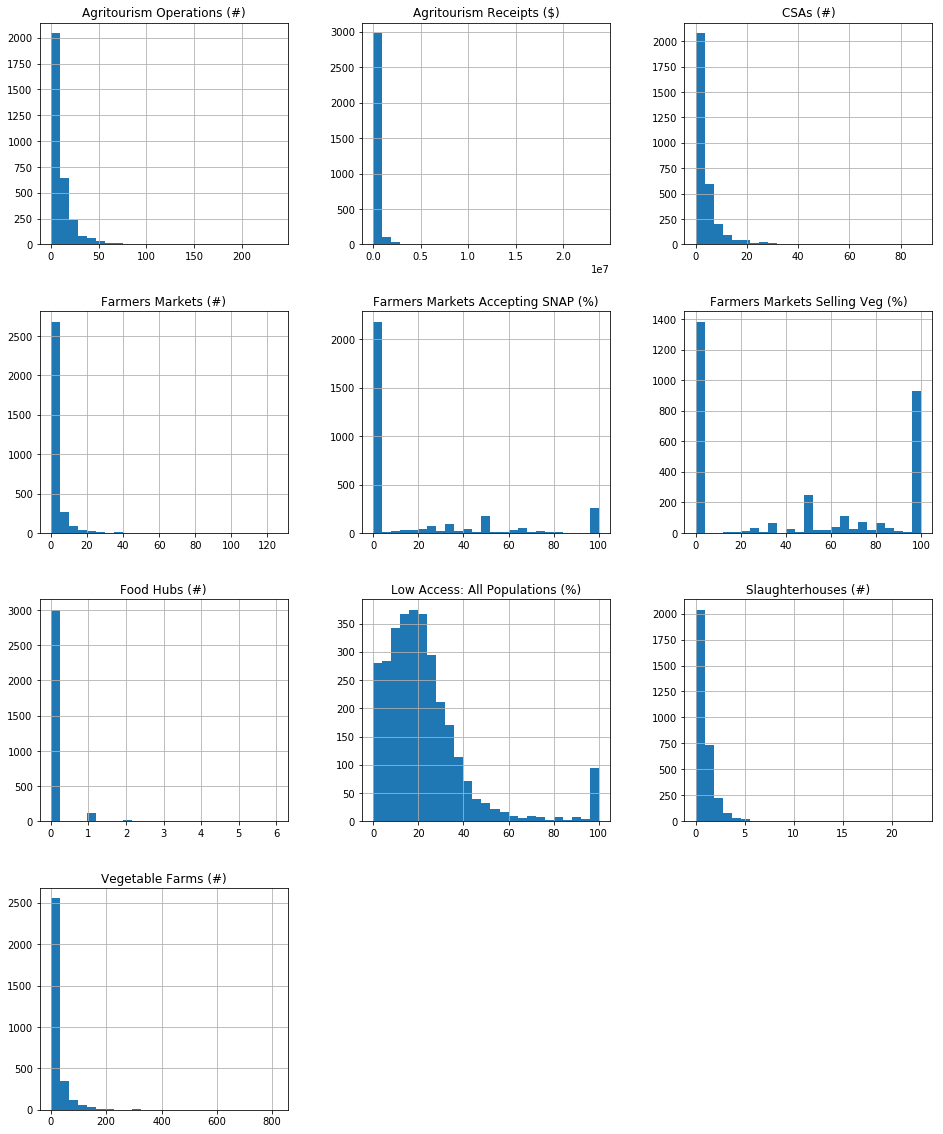

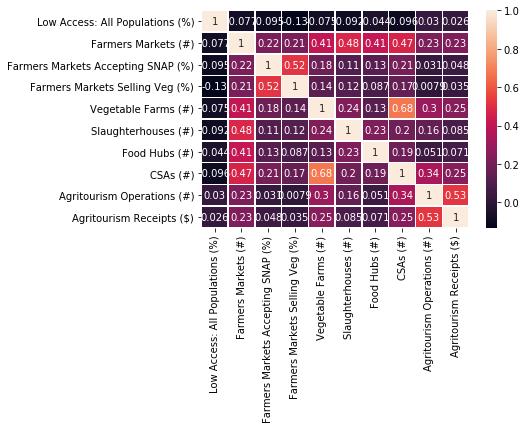

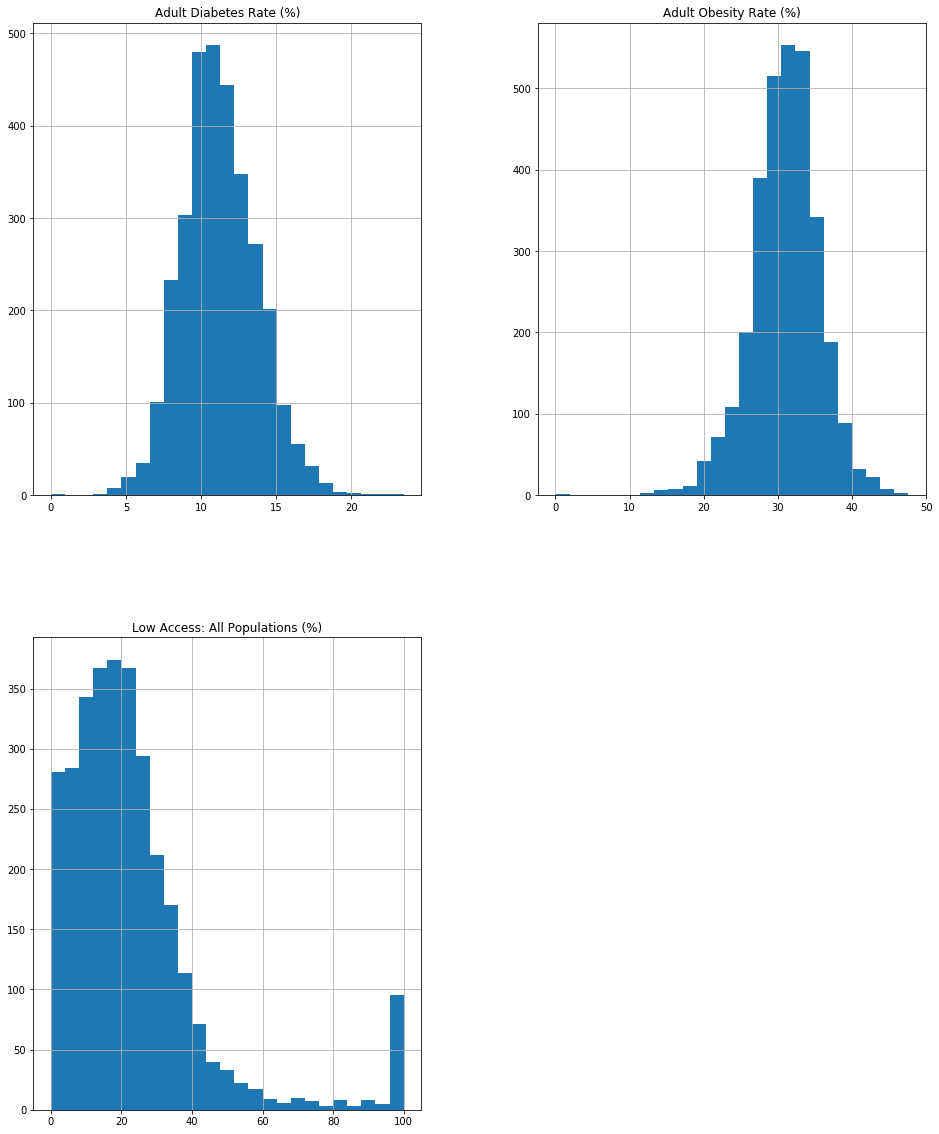

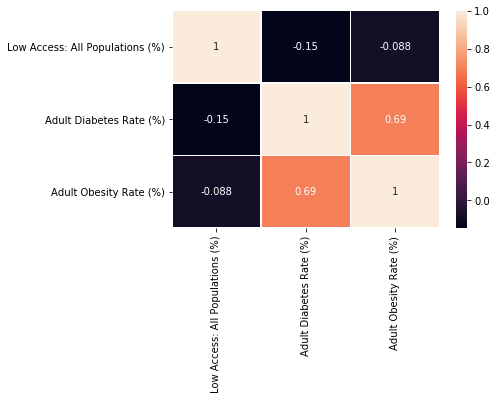

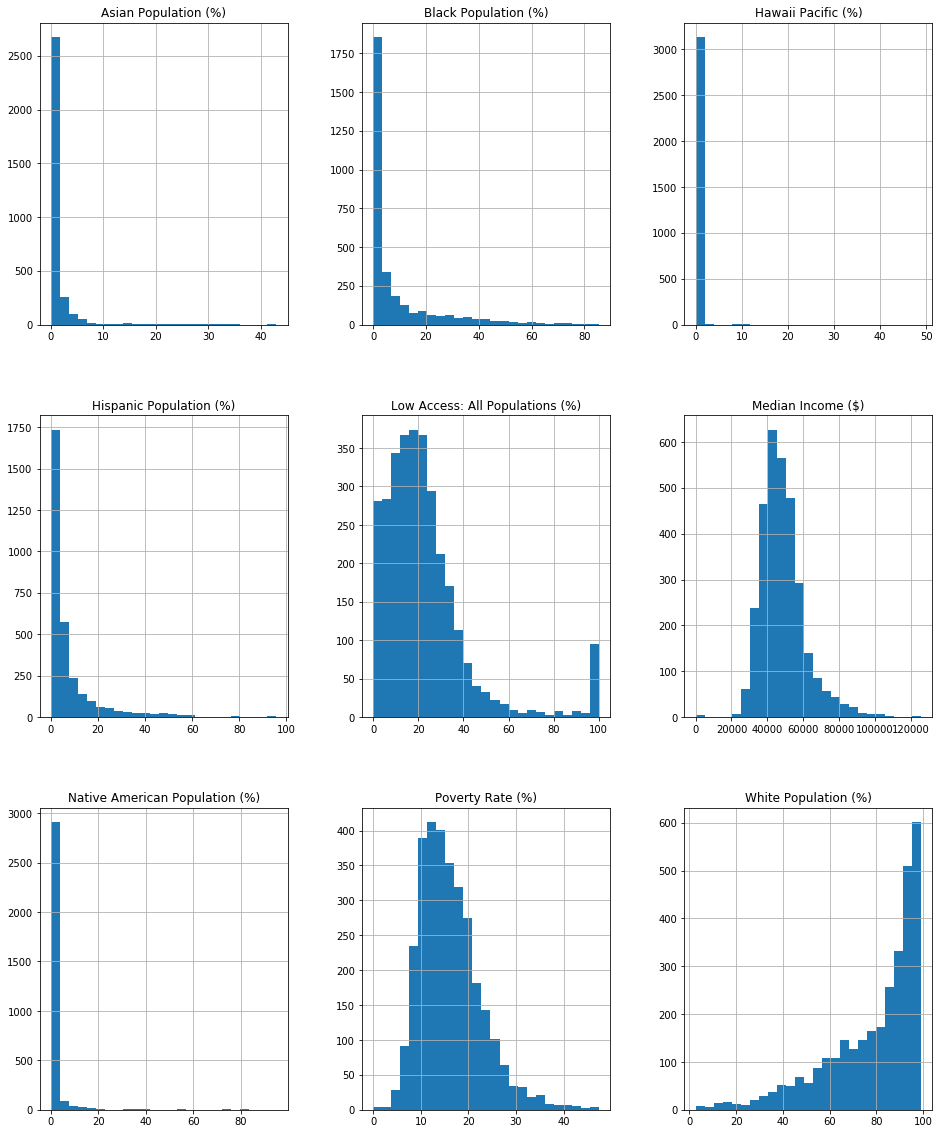

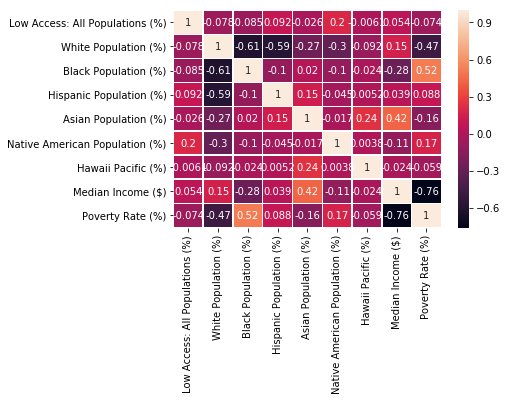

In [31]:
for var in usda_list:
    var.hist(figsize=(16, 20), bins=25, xlabelsize=10, ylabelsize=10);
    plt.show()
    sns.heatmap(var.corr(), annot = True, linewidths = 0.5)
    plt.show()

**Modeling**

There are two goals out of this project. The first is to see which variables have the greatest impact on the low access population in a county. The second goal is to create an optimum model that would be good at predicting whether a county is more like to have food deserts or not.

To accomplish the first goal, a Decision Tree Regressor will be created. For the second objective, the following models will be created and verified for efficiency:
1. Logistic Regression
2. KNN
3. Random Forest

**Model 1: Decision Tree Regressor**


In [32]:
# Set up the dependent variable (Low Access: All Populations (%)) and independent variables (everything else)
# Dropping 'Low Access: All Populations (%)' variable and additional location data from df with other variables
# Add a constant to the independent dataframe

usda_indep = usda.drop(['Low Access: All Populations (%)','Low Access: White (%)', 
                        'Low Access: Black (%)','Low Access: Hispanic (%)', 'Low Access: Asian (%)',
                        'Low Access: Native American (%)', 'Low Access: Hawaii Pacific (%)',
                        'State', 'County', 'County, State'], axis = 1)

dep = usda['Low Access: All Populations (%)']
indep = usda_indep

In [33]:
indep.head()

,"2016 Population, Estimate",Grocery Stores (#),Supercenter/Club Stores (#),Convenience Stores (#),Speciality Stores (#),SNAP Approved Stores (#),Fast Food Restaurants (#),Full Service Restaurants (#),Expenditure Per Capita: Fast Food ($),Expenditure Per Capita: Restaurants ($),...,Adult Diabetes Rate (%),Adult Obesity Rate (%),White Population (%),Black Population (%),Hispanic Population (%),Asian Population (%),Native American Population (%),Hawaii Pacific (%),Median Income ($),Poverty Rate (%)
0,55416.0,4,1,30,2,42.166667,36,29,674.80272,512.280987,...,13.0,34.1,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,56580.0,12.7
1,208563.0,29,6,118,26,198.083333,132,221,674.80272,512.280987,...,10.4,27.4,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,52387.0,12.9
2,25965.0,5,1,19,2,35.166667,22,15,674.80272,512.280987,...,18.4,44.4,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,31433.0,32.0
3,22643.0,5,1,15,1,19.583333,5,5,674.80272,512.280987,...,14.8,40.3,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,40767.0,22.2
4,57704.0,6,1,27,0,47.083333,21,15,674.80272,512.280987,...,14.1,34.6,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,50487.0,14.7


In [34]:
# Import the necessary packages
# Find the Mean Squared Error (MSE) for the model
# Train/test the linear regression model

In [35]:
# Setting the test size to 30%
# Print out the training and test set sizes
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2200, 36) (2200,)
(943, 36) (943,)


In [36]:
# Set the decision tree model variable
# Fit our model and conduct the predictions
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)

In [37]:
print(score)

0.3486132942796618


The R-squared score details that 34.8% of variance can be explained (not a great model). Let's look at feature importance.

In [53]:
# Look to see the most impactful features for the decision tree model
importances = regressor.feature_importances_

In [54]:
# Set up the features importance bar chart
features_regressor = pd.DataFrame(list(zip(indep.columns,regressor.feature_importances_))
                        ,columns=['feature','importance'])

features_regressor.plot(kind='bar', title='Decision Tree Regressor ', 
                        x='feature', y='importance', sort_columns=True)
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize='large')
plt.ylabel('Feature importance', fontsize='large')

Text(0,0.5,'Feature importance')

In [55]:
features_tree = pd.DataFrame(list(zip(indep.columns,regressor.feature_importances_)),columns=['feature','importance'])

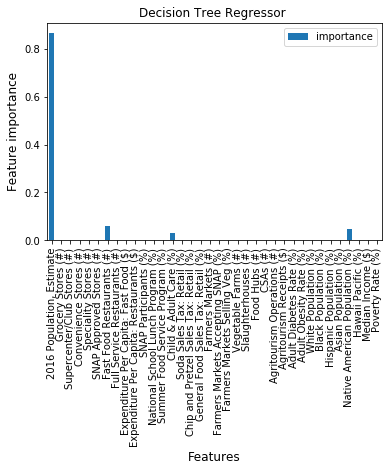

In [56]:
plt.show()

From the above chart, the features that have the biggest impact are county population, number of fast food restaurants, number of child and adult care participants, and the Native American population.

**Model 2: Classification Models**

First, let's determine the median of the Y variable, "Low Access: All Populations (%)". The median will be the indicator to classify whether a county is more likely or less likely to have food deserts.

In [42]:
# Find the median for "Low Access: All Populations (%)"
# Create a binary variable for the comments column with variables as 'High' (above median) vs. 'Low' (below median)

low_access_median = usda['Low Access: All Populations (%)'].median()

In [43]:
# Create a new column for the binary variables of 'Low Access: All Populations (%)'

usda['Access Magnitude'] = np.where(usda['Low Access: All Populations (%)']>=low_access_median , 'High', 'Low')

With two variables, the baseline accuracy will be 50%.

In [44]:
# Create the dependent and independent variables:

y = usda['Access Magnitude']
X = usda.drop(['Low Access: All Populations (%)','Low Access: White (%)', 
              'Low Access: Black (%)','Low Access: Hispanic (%)', 'Low Access: Asian (%)',
              'Low Access: Native American (%)', 'Low Access: Hawaii Pacific (%)',
              'State', 'County', 'County, State', 'Access Magnitude'], axis = 1)

In [45]:
# Standardize the X matrix because a K-nn model will be used soon
standardizer = lambda x: (x-np.mean(x))/np.std(x)

In [46]:
X = X.apply(standardizer)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Check to see if the train/test split was done correctly
assert X_train.shape[1] == X_test.shape[1]

In [48]:
# Create a confusion matrix model function to measure the ability of the model to determine
# True positives, true negatives, false positives, and false negatives

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    CM = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    # Assign true negatives, true positives, false negatives, and false positives:
    TN = CM[0][0]
    TP = CM[1][1]
    FN = CM[1][0]
    FP = CM[0][1]
    
    # Calculate metrics:
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    return([CM, accuracy, sensitivity, specificity])

In [49]:
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 5)

In [50]:
# Instantiate a dataframe to hold our scores for each model:
model_scores = pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity'])

# Make a dictionary for the different models to test
models = {'Default Logreg':logreg,'K-nn(5)':knn,'K-nn(3)':KNeighborsClassifier(n_neighbors=3),
          'K-nn(1)':KNeighborsClassifier(n_neighbors=1)}

# Run our function for each model and store the results as a new row in the dataframe:
for model in models:
    CM, accuracy, sensitivity, specificity = evaluate_model(models[model], X_train, X_test, y_train, y_test)
    model_scores.loc[len(model_scores)] = [model,accuracy,sensitivity,specificity]
    
model_scores

,Model,Accuracy,Sensitivity,Specificity
0,Default Logreg,0.652672,0.688000,0.620438
1,K-nn(5),0.643766,0.674667,0.615572
2,K-nn(3),0.642494,0.680000,0.608273
3,K-nn(1),0.642494,0.658667,0.627737


Out of the models above, the KNN(5) performed the best. It's time to determine if it will perform better than a random forest model.

In [51]:
# Setting up the parameters for the random forest model

y = LabelEncoder().fit_transform(usda['Access Magnitude'])
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
dt = RandomForestClassifier()
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

Random Forest Score:	0.693 ± 0.015


With an accuracy score of roughly 70%, our random forest model performs the best.